<a href="https://colab.research.google.com/github/harry9879/Computer-vision_pizza-or-steak/blob/main/Computer_vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-19 15:08:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   112MB/s    in 0.9s    

2023-02-19 15:08:46 (112 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it )

A very crucial step at the beginning of any machine learning project is becoming
one with the data..
And for computer vision project... this usually visualizing many samples of your data

In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 19 10:31 .
drwxr-xr-x 1 root root 4096 Feb 19 10:31 ..
drwxr-xr-x 4 root root 4096 Feb 19 10:31 test
drwxr-xr-x 4 root root 4096 Feb 19 10:31 train


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak"))

In [ ]:
num_steak_images_train

2

To Visualize our images, first let's get the class names programmatically

In [ ]:
import pathlib
import numpy as np;
data_dir = pathlib.Path("pizza_steak/train")
class_names  = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")
  return img

['2283057.jpg']
Image shape : (512, 512, 3)


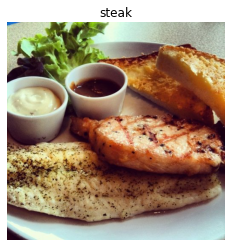

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [ ]:
import tensorflow as tf 

normalize_img = tf.constant(img)/255

## And end-to-end example

Let's build a convolutional neural network to find patterns in our images,
more specifically we a need way to:
* Load our Image
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CnN to our training data_data

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Set the seed 
tf.random.set_seed(42)

# Preprocess data  (get all the value btw 0 & 1 ,also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setups paths to the data directories 
train_dir = "/content/pizza_steak/train";
test_dir = "/content/pizza_steak/test";

# Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed = 42 )

valid_data = ImageDataGenerator(rescale = 1/255).flow_from_directory(
    directory = '/content/pizza_steak/test',
    target_size = (224,224),
    class_mode = "binary",
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
import tensorflow as tf
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, 
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10,3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, 
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
# Compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer = "Adam",
                metrics = ['accuracy'])
history_1  = model_1.fit(train_data,
                         epochs= 5, 
                         steps_per_epoch = len(train_data))

Epoch 1/5
47/47 [==============================] - 17s 155ms/step - loss: 0.5509 - accuracy: 0.7093
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4251 - accuracy: 0.8173
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3992 - accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3636 - accuracy: 0.8473
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3225 - accuracy: 0.8700


In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 =  model_2.fit(train_data,
                         epochs = 5, 
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data, 
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 1.0477 - accuracy: 0.6447 - val_loss: 0.5034 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 11s 241ms/step - loss: 0.5205 - accuracy: 0.7553 - val_loss: 0.6750 - val_accuracy: 0.6580
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6230 - accuracy: 0.7133 - val_loss: 0.4484 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4990 - accuracy: 0.7760 - val_loss: 0.4535 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 15s 313ms/step - loss: 0.4642 - accuracy: 0.7913 - val_loss: 0.4750 - val_accuracy: 0.7880


['3335267.jpg']
Image shape : (384, 512, 3)
['976382.jpg']
Image shape : (512, 512, 3)


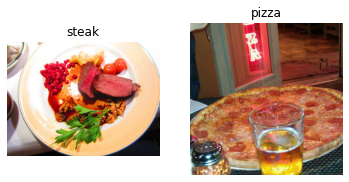

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"

In [ ]:
# Create train and test data generatoars and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator;
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir, # 
                                             target_size = (224,224), # Target size of images (height , width)
                                             class_mode = "binary", # type of data you're working with
                                             batch_size = 32)  # size of minibatches to load data into

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# get the first two images 
images[:2] , images[0].shape

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
labels

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten , Conv2D , MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this ) will be our baseline , a layers convolutional neural network
model_4 = Sequential([
    Conv2D(filters= 10 , 
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224,224, 3)),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    Flatten(),
    Dense(1,activation= 'sigmoid') # Output layer ( working with binary classification so only 1 output neuron)
])

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = 'Adam',
                metrics = ['accuracy'])
new__history = model_4.fit(train_data, 
                           epochs = 5,
                           steps_per_epoch = len(train_data),
                           validation_data = test_data,
                           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 195ms/step - loss: 0.6643 - accuracy: 0.7233 - val_loss: 0.3947 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3724 - accuracy: 0.8440 - val_loss: 0.4779 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.2885 - accuracy: 0.8973 - val_loss: 0.3173 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.1486 - accuracy: 0.9607 - val_loss: 0.4967 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.0775 - accuracy: 0.9840 - val_loss: 0.4439 - val_accuracy: 0.8180


In [ ]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Paper with code 

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-02-19 23:38:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.6MB/s    in 22s     

2023-02-19 23:38:46 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath,dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 19 23:38 .
drwxr-xr-x  1 root root 4096 Feb 19 23:38 ..
drwxr-xr-x 12 root root 4096 Feb 19 23:38 test
drwxr-xr-x 12 root root 4096 Feb 19 23:38 train


In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1918456.jpg']
Image shape : (512, 512, 3)


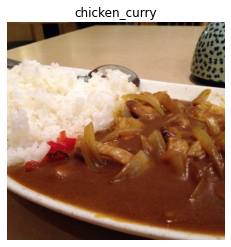

In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class= random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32, 
                                               target_size = (224,224),
                                               class_mode = "categorical",
                                               shuffle = True)

test_data = train_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32, 
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten , Dense
from tensorflow.keras import Sequential
import tensorflow as tf

In [ ]:
multi_model = Sequential([
    Conv2D(filters = 10, 
           kernel_size = 3, 
           activation = 'relu',
           input_shape = (224, 224, 3)
           ),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

multi_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
history_multi = multi_model.fit(test_data,
                epochs = 5, 
                steps_per_epoch = len(test_data),
                validation_data = test_data,
                validation_steps = len(test_data))

Epoch 1/5
79/79 [==============================] - 23s 269ms/step - loss: 2.2307 - accuracy: 0.1564 - val_loss: 2.0799 - val_accuracy: 0.2820
Epoch 2/5
79/79 [==============================] - 22s 282ms/step - loss: 1.9846 - accuracy: 0.3052 - val_loss: 1.8034 - val_accuracy: 0.3612
Epoch 3/5
79/79 [==============================] - 22s 282ms/step - loss: 1.7624 - accuracy: 0.3980 - val_loss: 1.5691 - val_accuracy: 0.4568
Epoch 4/5
79/79 [==============================] - 24s 311ms/step - loss: 1.5425 - accuracy: 0.4608 - val_loss: 1.3258 - val_accuracy: 0.5680
Epoch 5/5
79/79 [==============================] - 22s 286ms/step - loss: 1.3105 - accuracy: 0.5548 - val_loss: 1.0466 - val_accuracy: 0.6628


In [ ]:
multi_model.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 0.0030 - accuracy: 1.0000


[0.0030120988376438618, 1.0]

In [ ]:
sushi = mpimg.imread("sushi.jpg")
multi_model.predict(tf.image.resize(tf.expand_dims(sushi/255. ,axis= 0), size=(224,224))).round(3)

1/1 [==============================] - 0s 19ms/step


array([[0.014, 0.006, 0.001, 0.009, 0.315, 0.385, 0.001, 0.067, 0.197,
        0.007]], dtype=float32)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
 def plot_loss_curves(history):
   """
   Returns seperated loss curves for training and validation metrics 
   """
   loss = history.history['loss']
   val_loss =history.history["val_loss"]

   accuracy = history.history["accuracy"]
   val_accuracy = history.history["val_accuracy"]

   epochs = range(len(history.history["loss"])) # How many epochs did we run for? 

   # Plot loss
   plt.plot(epochs, loss, label = "training_loss")
   plt.plot(epochs, val_loss, label = "val_loss")
   plt.title("loss")
   plt.xlabel("epochs")
   plt.legend()

   # Plot accuracy 
   plt.plot(epochs, accuracy, label = "training_accuracy")
   plt.plot(epochs, val_accuracy, label="val_accuracy")
   plt.title("accuracy")
   plt.xlabel("epochs")
   plt.legend()

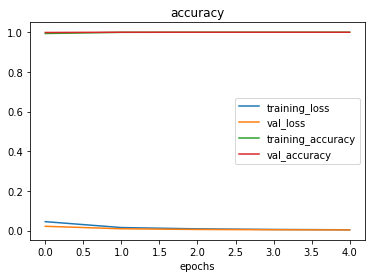

In [ ]:
plot_loss_curves(history_multi)